In [36]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [45]:
df = pd.read_csv('data/news_articles.csv')
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [47]:
df.describe()

,hasImage
count,2095.000000
mean,0.777088
std,0.416299
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [48]:
df.shape

(2096, 12)

In [49]:
df.count()

author                     2096
published                  2096
title                      2096
text                       2050
language                   2095
site_url                   2095
main_img_url               2095
type                       2095
label                      2095
title_without_stopwords    2094
text_without_stopwords     2046
hasImage                   2095
dtype: int64

In [50]:
df.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [51]:
df.dropna(inplace=True)

In [52]:
#Create Dummies to represent Real and Fake by 1 and 0

dum_type=pd.get_dummies(df.label,drop_first=True,prefix="")
df=df.join(dum_type)
df.drop('label', axis=1, inplace=True)
df.rename(columns={'_Real':'Real'}, inplace=True)

Text(0.5, 1.0, 'Real and Fake Data')

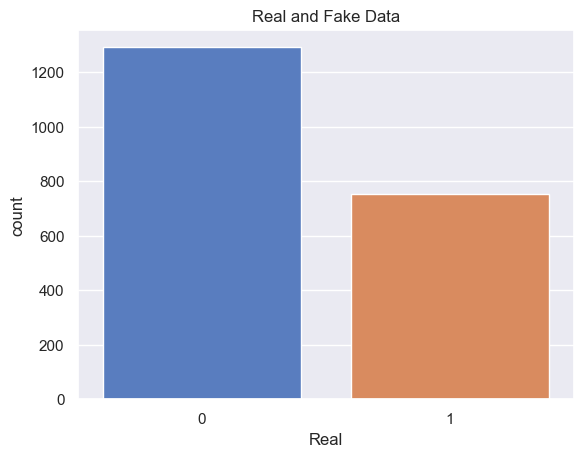

In [55]:
#plot to see Counts of Real and Fake data
sb.set_theme(style="darkgrid")
ax = sb.countplot(x="Real", data=df, palette='muted')
ax.set_title("Real and Fake Data")

Text(0.5, 1.0, 'Count of Type of the news')

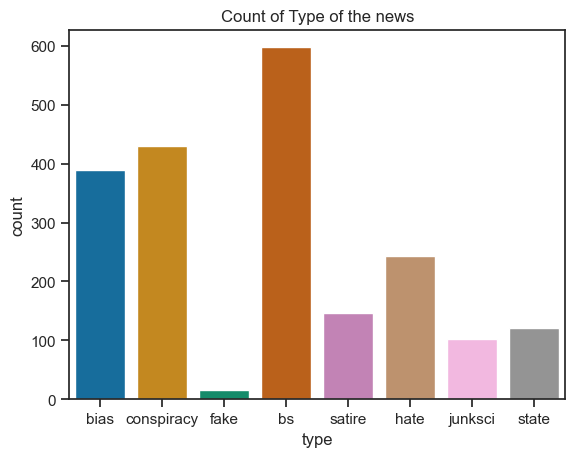

In [56]:
#plot to see Counts of type of news data
sb.set_theme(style="ticks")
ax = sb.countplot(x="type", data=df, palette='colorblind')
ax.set_title("Count of Type of the news")

Text(0.5, 1.0, 'Count of news with Images')

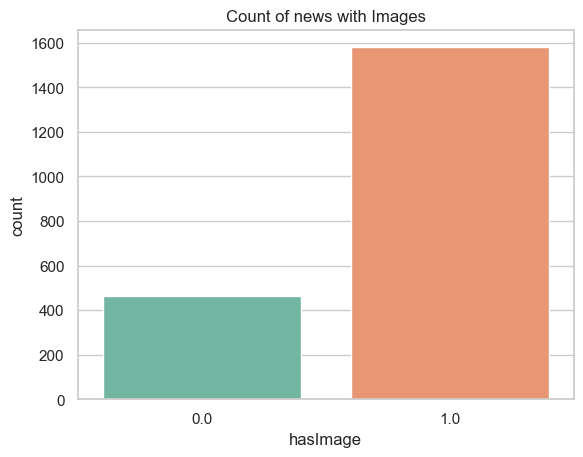

In [57]:
#plot to see Counts news data that have images or no
sb.set_theme(style="whitegrid")
ax = sb.countplot(x="hasImage", data=df, palette='Set2')
ax.set_title("Count of news with Images")

Text(0.5, 1.0, 'Top 10 Authors with count of news')

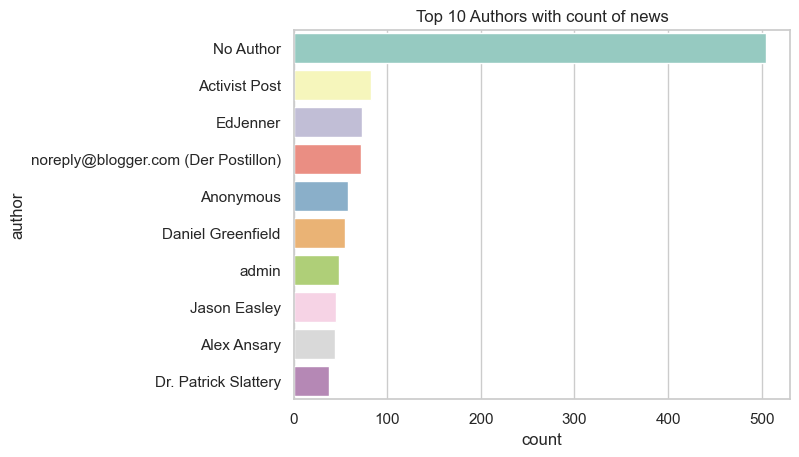

In [58]:
#plot to see top 10 Authors with most news articles
sb.set_theme(style="whitegrid")
ax = sb.countplot(y="author", data=df, palette='Set3', order =df.author.value_counts().iloc[:10].index)
ax.set_title("Top 10 Authors with count of news")

Text(0.5, 1.0, 'Top 10 Site URLS with count of news')

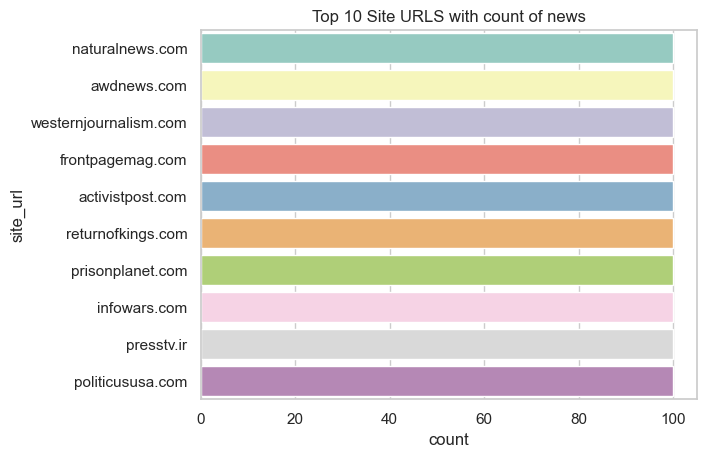

In [59]:
#plot to see top 10 Authors with most news urls
sb.set_theme(style="whitegrid")
ax = sb.countplot(y="site_url", data=df, palette='Set3', order =df.site_url.value_counts().iloc[:10].index)
ax.set_title("Top 10 Site URLS with count of news")

In [60]:
#Fake Authors
df.loc[df.Real == 0].author.value_counts().head(10)

No Author                              329
Activist Post                           82
noreply@blogger.com (Der Postillon)     72
Anonymous                               58
admin                                   48
Alex Ansary                             44
Henry Wolff                             33
Corbett                                 27
tokyowashi (noreply@blogger.com)        20
Steve Watson                            16
Name: author, dtype: int64

In [61]:
#Fake URL sites
df.loc[df.Real == 0].site_url.value_counts().head(10)

activistpost.com      100
infowars.com          100
awdnews.com           100
naturalnews.com       100
clickhole.com         100
prisonplanet.com       99
abeldanger.net         82
der-postillon.com      72
ahtribune.com          67
abovetopsecret.com     53
Name: site_url, dtype: int64

In [62]:
#Real Authors
df.loc[df.Real == 1].author.value_counts().head(10)

No Author               176
EdJenner                 73
Daniel Greenfield        53
Jason Easley             45
Dr. Patrick Slattery     36
-NO AUTHOR-              22
Sarah Jones              16
Roosh Valizadeh          15
Hrafnkell Haraldsson     15
Fed Up                   12
Name: author, dtype: int64

In [63]:
#Real URL sites
df.loc[df.Real == 1].site_url.value_counts().head(10)

politicususa.com         100
presstv.ir                99
returnofkings.com         99
frontpagemag.com          99
westernjournalism.com     98
dailywire.com             81
wnd.com                   51
davidduke.com             44
100percentfedup.com       33
presstv.com               21
Name: site_url, dtype: int64

In [64]:
real = set(df[df['Real'] == 1]['site_url'].unique())
fake = set(df[df['Real'] == 0]['site_url'].unique())
print(f"{real & fake}")

{'presstv.ir', 'returnofkings.com', 'westernjournalism.com', 'prisonplanet.com', 'newstarget.com', 'washingtonsblog.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'davidduke.com'}


In [69]:
#target is our column to be predicted and features are the columns that we will use for modelling
target = df.Real
features = df[['author','site_url','text_without_stopwords']]
features

,author,site_url,text_without_stopwords
0,Barracuda Brigade,100percentfedup.com,print pay back money plus interest entire fami...
1,reasoning with facts,100percentfedup.com,attorney general loretta lynch plead fifth bar...
2,Barracuda Brigade,100percentfedup.com,red state fox news sunday reported morning ant...
3,Fed Up,100percentfedup.com,email kayla mueller prisoner tortured isis cha...
4,Fed Up,100percentfedup.com,email healthcare reform make america great sin...
...,...,...,...
2041,Matt Barber,wnd.com,check hillarythemed haunted house anticlinton ...
2042,Jane Chastain,wnd.com,good samaritan wearing indian headdress disarm...
2043,Michael Brown,wnd.com,skype sex scam fortune built shame moroccan bo...
2044,Ann Coulter,wnd.com,posted eddie skyhigh potency may scare away cr...


In [70]:
# Combining features into single column for easier processing
features['combined_url_text'] = features["author"]+" "+features["site_url"] + " " + features["text_without_stopwords"]
features.drop(['author','site_url', 'text_without_stopwords'], axis = 1, inplace = True)
features=features.combined_url_text
features

C:\Users\user\AppData\Local\Temp\ipykernel_14008\2526536705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['combined_url_text'] = features["author"]+" "+features["site_url"] + " " + features["text_without_stopwords"]
C:\Users\user\AppData\Local\Temp\ipykernel_14008\2526536705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(['author','site_url', 'text_without_stopwords'], axis = 1, inplace = True)


0       Barracuda Brigade 100percentfedup.com print pa...
1       reasoning with facts 100percentfedup.com attor...
2       Barracuda Brigade 100percentfedup.com red stat...
3       Fed Up 100percentfedup.com email kayla mueller...
4       Fed Up 100percentfedup.com email healthcare re...
                              ...                        
2041    Matt Barber wnd.com check hillarythemed haunte...
2042    Jane Chastain wnd.com good samaritan wearing i...
2043    Michael Brown wnd.com skype sex scam fortune b...
2044    Ann Coulter wnd.com posted eddie skyhigh poten...
2045    Larry Elder wnd.com billion even known keeping...
Name: combined_url_text, Length: 2045, dtype: object

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_words = TfidfVectorizer(stop_words='english')
X = vectorizer_words.fit_transform(features)

In [72]:
# Clustering Data into two cluster: Real and Fake
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 1, verbose = True)
km.fit(X)

Initialization complete
Iteration 0, inertia 3953.53387496456.
Iteration 1, inertia 1998.6786676607285.
Iteration 2, inertia 1995.5397213719484.
Iteration 3, inertia 1992.849435923792.
Iteration 4, inertia 1992.5714808354255.
Iteration 5, inertia 1992.4760880703448.
Iteration 6, inertia 1992.4043646033103.
Iteration 7, inertia 1992.3800572139062.
Iteration 8, inertia 1992.340284612093.
Iteration 9, inertia 1992.2985384536933.
Iteration 10, inertia 1992.2060970099656.
Iteration 11, inertia 1992.0042030694697.
Iteration 12, inertia 1991.675504941652.
Iteration 13, inertia 1991.1020647866476.
Iteration 14, inertia 1990.767260584891.
Iteration 15, inertia 1990.6776585243456.
Iteration 16, inertia 1990.6723324771285.
Converged at iteration 16: strict convergence.


KMeans(max_iter=100, n_clusters=2, n_init=1, verbose=True)

In [73]:
np.unique(km.labels_, return_counts=True)
features.reset_index(drop=True, inplace=True)

In [74]:
text={}
for i,cluster in enumerate(km.labels_):
    oneDocument = features[i]
    if cluster not in text.keys():
        text[cluster] = oneDocument
    else:
        text[cluster] += oneDocument

In [77]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from string import punctuation
from heapq import nlargest
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [81]:
_stopwords = set(stopwords.words('english') + list(punctuation))

keywords = {}
counts={}
for cluster in range(2):
    word_sent = word_tokenize(text[cluster].lower())
    word_sent=[word for word in word_sent if word not in _stopwords]
    freq = FreqDist(word_sent)
    keywords[cluster] = nlargest(100, freq, key=freq.get)
    counts[cluster]=freq

In [82]:
set0 = set(keywords[0])
set1 = set(keywords[1])
unique0 = set0-set1
unique1 = set1-set0

unique_keys = {}
unique_keys[0] = nlargest(10, unique0, key=counts[0].get)
unique_keys[1] = nlargest(10, unique1, key=counts[1].get)

unique_keys

{0: ['der', 'die', 'und', 'zu', 'das', 'mit', 'auf', 'von', 'den', 'sich'],
 1: ['clinton',
  'one',
  'said',
  'people',
  'would',
  'hillary',
  'also',
  'like',
  'election',
  'time']}

In [84]:
# Using the Vectorizer before Classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.20)

vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=vectorizer.get_feature_names_out())

In [85]:
# Kneighbors Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNb = KNeighborsClassifier(n_neighbors=5)
KNb.fit(tfidf_train, y_train)
y_pred = KNb.predict(tfidf_test)
KNscore = metrics.accuracy_score(y_test,y_pred)
print("Kneighbors Model accuracy: %0.4f" %KNscore)

Kneighbors Model accuracy: 0.7359


In [86]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=1000)
RF.fit(tfidf_train,y_train)
y_pred = RF.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred)
print("Random Forest Model accuracy:  %0.4f" %RFscore)

Random Forest Model accuracy:  0.9511


In [87]:
#Adaboost Classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5)
Adab.fit(tfidf_train, y_train)
y_pred = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred)
print("Ada boost Classifier accuracy: %0.4f" %ABscore)

Ada boost Classifier accuracy: 0.9535


In [88]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[256  11]
 [  8 134]]


<Axes: xlabel='Predicted', ylabel='Actual'>

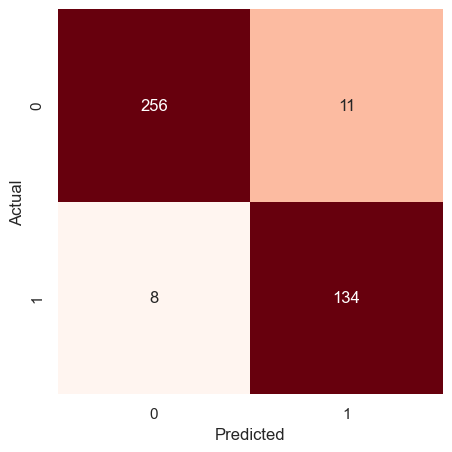

In [89]:
#creating a matrix using seaborn
import seaborn as sns

cm_df = pd.DataFrame(conf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'Actual'
cm_df
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, vmax=20, square=True, cmap="Reds",annot_kws={"size":12} ,cbar=False, fmt='g')